<a href="https://colab.research.google.com/github/donaldocelaj/DS-Unit-1-Sprint-3-Data-Storytelling/blob/master/LS_DS_223_Make_explanatory_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Make explanatory visualizations




Tody we will reproduce this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)

In [0]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

Using this data: https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

Objectives
- add emphasis and annotations to transform visualizations from exploratory to explanatory
- remove clutter from visualizations

Links
- [Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)
- [Remove to improve (the data-ink ratio)](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)

## Make prototypes

This helps us understand the problem. We'll just make up some plausible fake data. The purpose is to understand what we're looking for, when we wrangle the real data. (If you don't know what you're looking for, it's going to be hard to find!)

One format could be a list of 10 numbers. (The aggregated counts of ratings.)

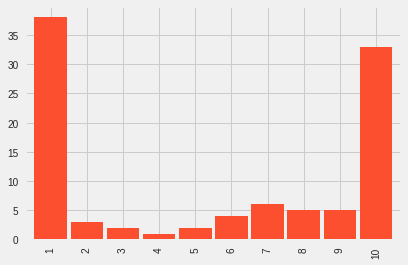

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

fake.plot.bar(color='C1', width=0.9);

Another data format could be the raw votes themselves.  It looks like a sideways histogram.

So if I can find either of these data representations in the underlying raw data, then I can replicate the chart.

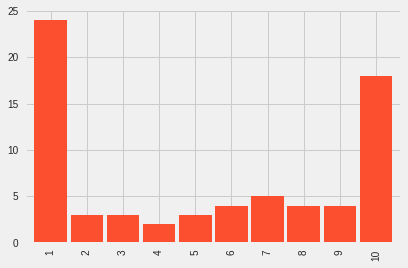

In [0]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);

## Annotate with text

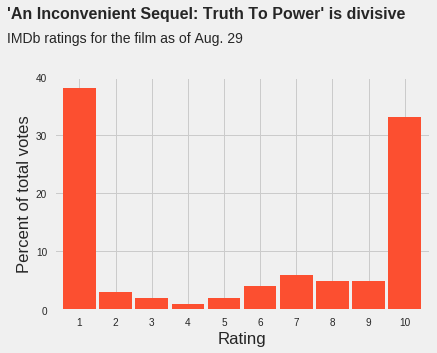

In [0]:
plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

ax = fake.plot.bar(color='C1', width=0.9)

ax.tick_params(labelrotation=0)

ax.text(x=-2, y=50, s="'An Inconvenient Sequel: Truth To Power' is divisive", 
        fontsize=16, fontweight='bold')

ax.text(x=-2, y=46, s='IMDb ratings for the film as of Aug. 29')

ax.set(xlabel='Rating', 
       ylabel='Percent of total votes', 
       yticks=range(0,50,10));

## Reproduce with real data

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

The chart only has 10 datapoints. The dataset has over 2 million. How are we going to find the 10 datapoints in all this data? With data wrangling skills.

In [0]:
width, height = df.shape
width * height

2161431

Some questions we can ask:
- Are there other movies included in this dataset? Is that why it's so big?
- Is the data an event log of votes that I need to sum up? Or are the vote counts cumulative snapshots from the web scraping, and I can just take the final count from the last date and time?

If this seems tedious and confusing, even for a simple example, then welcome to the real world of data science! "80%" is data wrangling. You'll be hired by businesses where data is not in pristine state and not well documented.

These columns look useful. But I want to look at the timestamps to better understand the data.


In [0]:
pd.options.display.max_columns = 500
df.head()

The date range matches the documentation on GitHub.

In [0]:
df.timestamp = pd.to_datetime(df.timestamp)

In [0]:
df.timestamp.describe()

I can use the timestamp as the index, and look at day from the last day:

In [0]:
df = df.set_index('timestamp')

In [0]:
df['2017-08-29']

Even when I'm filtering to just the last date, there's still a lot of data here. Maybe the web scraper is hitting this repeatedly?

I still want to verify, is this only one movie? I'll look at `links` and `category`

In [0]:
df.link.value_counts()

In [0]:
df.category.value_counts()

We want total votes, so it looks like the right category is all `'IMDb users'`

In [0]:
df[df.category=='IMDb users']

The data appears to only be ratings for this one movie.

And it looks like it is cumulative, so I shouldn't have to add anything up. I can just take the last timestamp. But I want to be sure. So I just look at the last day, and plot the number of respondents. It always goes up — "increasing monotonically." This verifies that the vote counts are cumulative.

In [0]:
lastday = df['2017-08-29']

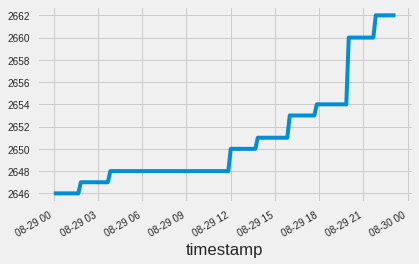

In [0]:
lastday[lastday.category=='IMDb users'].respondents.plot();

So this is the data we want!

In [0]:
final = df.tail(1)

In [0]:
columns = [str(i) + '_pct' for i in range(1,11)]
final[columns]

When we transpose, it looks like the format we want, from the first "mockup" with fake data

In [0]:
data = final[columns].T

When we plot it, we get a bar chart with the correct bar heights, from real world data.

Out of 2 million data points, we found the 10 we need to reproduce the particular chart. It might have seemed difficult, but we did it with no documentation on the data other than one sentence on GitHub. And we did exploratory data analysis to verify that our assumptions were correct: that we were using the correct data and interpreting it correctly.

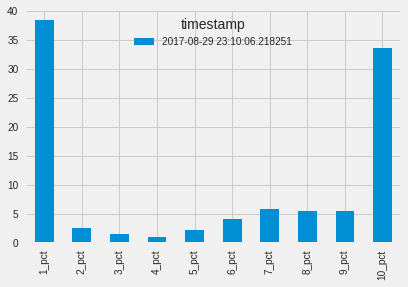

In [0]:
data.plot.bar();

Then we just copy & paste our code from before, to add the annotations, plus a few details:

In [0]:
data.index = range(1, 11)

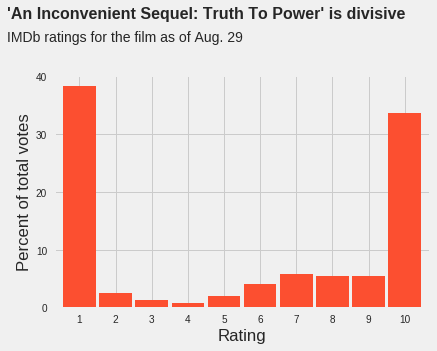

In [0]:
plt.style.use('fivethirtyeight')

ax = data.plot.bar(color='C1', width=0.9, legend=False)

ax.tick_params(labelrotation=0)

ax.text(x=-2, y=50, s="'An Inconvenient Sequel: Truth To Power' is divisive", 
        fontsize=16, fontweight='bold')

ax.text(x=-2, y=46, s='IMDb ratings for the film as of Aug. 29')

ax.set(xlabel='Rating', 
       ylabel='Percent of total votes', 
       yticks=range(0,50,10));

# ASSIGNMENT

Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

# STRETCH OPTIONS

#### Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

If you aren't sure what to choose, try:
- the chart titled ["Men dominated Al Gore's IMDb movie rating"](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)
- or the tutorial, [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)

Other options include:
- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) (try the [`altair`](https://altair-viz.github.io/gallery/index.html#maps) library)
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) (try the [`statsmodels`](https://www.statsmodels.org/stable/index.html) library)
- or another example of your choice!

#### Make more charts!

Choose a chart you want to make, from [FT's Visual Vocabulary poster](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!







